In [414]:
#######################################
# CS 424 - Project 1
# Kevin Kowalski
#######################################
#
# This file contains the code to clean
# the original data set. It outputs
# the necessary plots and updated data
# set to be used by shiny.
#
# This file was used for testing and 
# plotting before using RStudio for a
# dashboard.
#
####################################### 

In [415]:
# import libraries
library(leaflet)
library(lubridate)
library(dplyr)
library(ggplot2)
library(scales)
library(stringr)

In [416]:
# read original data
data_original <- read.table(file = "litterati_challenge-65.csv", sep = ",", header = TRUE)

In [417]:
# see top of data
head(data_original)

challengeId,litterjoinId,litterId,litterTimestamp,lat,lon,tags,url,user_id,username
65,5480356,4930102,2020-01-07 22:14:20,41.86555,-87.81282,"wrapper,cigarette,plastic",https://s3.amazonaws.com/litterati-v3-bucket/2020/1/7/34059-ltr_1578431660.841352_856DCED5-73C1-4F00-9788-8476F3A515B5.jpg,34059,julieta
65,5480352,4930101,2020-01-07 22:14:04,41.86549,-87.81285,"plastic,wrapper",https://s3.amazonaws.com/litterati-v3-bucket/2020/1/7/34059-ltr_1578431644.2910419_FD168AC1-95C4-4000-A6E6-30432C200FD8.jpg,34059,julieta
65,5480348,4930100,2020-01-07 22:14:18,41.86555,-87.81285,"papertowel,paper",https://s3.amazonaws.com/litterati-v3-bucket/2020/1/7/34059-ltr_1578431658.6658711_DDE3CD30-8544-436B-92AD-4B244C68F0DA.jpg,34059,julieta
65,5480344,4930099,2020-01-07 22:14:22,41.86556,-87.81281,plastic,https://s3.amazonaws.com/litterati-v3-bucket/2020/1/7/34059-ltr_1578431662.3577209_27179EC7-5375-4676-804F-2CE25CCC8A7E.jpg,34059,julieta
65,5480340,4930098,2020-01-07 22:15:21,41.86545,-87.81280,"plastic,bag,walmart",https://s3.amazonaws.com/litterati-v3-bucket/2020/1/7/34059-ltr_1578431721.325562_EEBD0732-96F3-441F-8A7D-9E6AF68BBD13.jpg,34059,julieta
65,5480336,4930097,2020-01-07 22:13:37,41.86540,-87.81265,"plastic,candy,dumdums,wrapper",https://s3.amazonaws.com/litterati-v3-bucket/2020/1/7/34059-ltr_1578431617.1624532_7DD24C26-5E55-4F8F-BF5A-ECA68E012EE7.jpg,34059,julieta


In [418]:
# get strings, summary, and dimensions of data
str(data_original)
summary(data_original)
dim(data_original)

'data.frame':	12646 obs. of  10 variables:
 $ challengeId    : int  65 65 65 65 65 65 65 65 65 65 ...
 $ litterjoinId   : int  5480356 5480352 5480348 5480344 5480340 5480336 5480332 5480328 5480324 5480320 ...
 $ litterId       : int  4930102 4930101 4930100 4930099 4930098 4930097 4930096 4930095 4930094 4930093 ...
 $ litterTimestamp: Factor w/ 12558 levels "2018-04-19 18:42:50",..: 12556 12554 12555 12557 12558 12552 12551 12550 12553 12548 ...
 $ lat            : num  41.9 41.9 41.9 41.9 41.9 ...
 $ lon            : num  -87.8 -87.8 -87.8 -87.8 -87.8 ...
 $ tags           : Factor w/ 2227 levels "","7 up,aluminum,can",..: 2110 1619 1294 1320 1346 1387 1619 1320 2145 1088 ...
 $ url            : Factor w/ 12625 levels "https://litterati-images-prod.s3-us-west-2.amazonaws.com/2018/04/19/05d2ad10-10ec-11e9-9366-0f84017efb1f-34059.jpg",..: 12623 12621 12622 12624 12625 12619 12618 12617 12620 12615 ...
 $ user_id        : int  34059 34059 34059 34059 34059 34059 34059 34059 34059 3405

  challengeId  litterjoinId        litterId                  litterTimestamp 
 Min.   :65   Min.   :1218447   Min.   :1218446   2019-05-05 02:04:46:    4  
 1st Qu.:65   1st Qu.:3119431   1st Qu.:3119523   2019-05-05 02:04:47:    4  
 Median :65   Median :3359042   Median :3359134   2019-05-09 17:09:33:    4  
 Mean   :65   Mean   :3565466   Mean   :3511399   2019-05-13 17:05:50:    4  
 3rd Qu.:65   3rd Qu.:4177098   3rd Qu.:4177406   2019-05-13 17:08:31:    4  
 Max.   :65   Max.   :5480356   Max.   :4930102   2019-05-05 02:04:48:    3  
                                                  (Other)            :12623  
      lat              lon                      tags     
 Min.   :-87.81   Min.   :-87.84                  :1573  
 1st Qu.: 41.86   1st Qu.:-87.81   paper          :1388  
 Median : 41.87   Median :-87.81   plastic        :1237  
 Mean   : 39.70   Mean   :-83.17   plastic,wrapper: 458  
 3rd Qu.: 41.87   3rd Qu.:-87.81   wrapper,plastic: 438  
 Max.   : 41.89   Max.   : 4

[1] 12646    10

In [419]:
# copy original data to new dataframe to manipulate
data <- data.frame(data_original)

In [420]:
# drop redundant or unused columns
data$challengeId <- NULL
data$litterjoinId <- NULL
data$litterId <- NULL
head(data)

litterTimestamp,lat,lon,tags,url,user_id,username
2020-01-07 22:14:20,41.86555,-87.81282,"wrapper,cigarette,plastic",https://s3.amazonaws.com/litterati-v3-bucket/2020/1/7/34059-ltr_1578431660.841352_856DCED5-73C1-4F00-9788-8476F3A515B5.jpg,34059,julieta
2020-01-07 22:14:04,41.86549,-87.81285,"plastic,wrapper",https://s3.amazonaws.com/litterati-v3-bucket/2020/1/7/34059-ltr_1578431644.2910419_FD168AC1-95C4-4000-A6E6-30432C200FD8.jpg,34059,julieta
2020-01-07 22:14:18,41.86555,-87.81285,"papertowel,paper",https://s3.amazonaws.com/litterati-v3-bucket/2020/1/7/34059-ltr_1578431658.6658711_DDE3CD30-8544-436B-92AD-4B244C68F0DA.jpg,34059,julieta
2020-01-07 22:14:22,41.86556,-87.81281,plastic,https://s3.amazonaws.com/litterati-v3-bucket/2020/1/7/34059-ltr_1578431662.3577209_27179EC7-5375-4676-804F-2CE25CCC8A7E.jpg,34059,julieta
2020-01-07 22:15:21,41.86545,-87.81280,"plastic,bag,walmart",https://s3.amazonaws.com/litterati-v3-bucket/2020/1/7/34059-ltr_1578431721.325562_EEBD0732-96F3-441F-8A7D-9E6AF68BBD13.jpg,34059,julieta
2020-01-07 22:13:37,41.86540,-87.81265,"plastic,candy,dumdums,wrapper",https://s3.amazonaws.com/litterati-v3-bucket/2020/1/7/34059-ltr_1578431617.1624532_7DD24C26-5E55-4F8F-BF5A-ECA68E012EE7.jpg,34059,julieta


In [421]:
# rename longitude column for leaflet
data$long <- data$lon
data$lon <- NULL
data <- data[, c(1:2, 7, 3:6)]

In [422]:
# remove out of range data
data <- data[(data$lat < 41.884 & data$lat > 41.853 & data$long < -87.803 & data$long > -87.827),]

In [423]:
# untagged items given "untagged" tag, using regex pattern ^$ for empty strings
data$tags <- sub("^$", "untagged", data$tags)

In [424]:
# convert all tags to list of individual tags, using regex pattern ,.* for anything following a comma
data$tags <- gsub(",.*", "", data$tags)
tags_list <- data$tags

In [425]:
# convert timestamp from GMT to CST timezone
x <- as.POSIXct(data$litterTimestamp, tz = "GMT")
data$litterTimestamp <- with_tz(x, "America/Chicago")

In [426]:
# separate timestamp column into date and time columns
data$date <- as.Date(data$litterTimestamp)
data$time <- format(as.POSIXct(data$litterTimestamp), format = "%H:%M:%S")

# drop unnecessary timestamp column
data$litterTimestamp <- NULL

# move new data and time columns to front
data <- data[,c(7, 8, 1:6)]

In [427]:
# get glance of cleaned data set
head(data)

date,time,lat,long,tags,url,user_id,username
2020-01-07,16:14:20,41.86555,-87.81282,wrapper,https://s3.amazonaws.com/litterati-v3-bucket/2020/1/7/34059-ltr_1578431660.841352_856DCED5-73C1-4F00-9788-8476F3A515B5.jpg,34059,julieta
2020-01-07,16:14:04,41.86549,-87.81285,plastic,https://s3.amazonaws.com/litterati-v3-bucket/2020/1/7/34059-ltr_1578431644.2910419_FD168AC1-95C4-4000-A6E6-30432C200FD8.jpg,34059,julieta
2020-01-07,16:14:18,41.86555,-87.81285,papertowel,https://s3.amazonaws.com/litterati-v3-bucket/2020/1/7/34059-ltr_1578431658.6658711_DDE3CD30-8544-436B-92AD-4B244C68F0DA.jpg,34059,julieta
2020-01-07,16:14:22,41.86556,-87.81281,plastic,https://s3.amazonaws.com/litterati-v3-bucket/2020/1/7/34059-ltr_1578431662.3577209_27179EC7-5375-4676-804F-2CE25CCC8A7E.jpg,34059,julieta
2020-01-07,16:15:21,41.86545,-87.81280,plastic,https://s3.amazonaws.com/litterati-v3-bucket/2020/1/7/34059-ltr_1578431721.325562_EEBD0732-96F3-441F-8A7D-9E6AF68BBD13.jpg,34059,julieta
2020-01-07,16:13:37,41.86540,-87.81265,plastic,https://s3.amazonaws.com/litterati-v3-bucket/2020/1/7/34059-ltr_1578431617.1624532_7DD24C26-5E55-4F8F-BF5A-ECA68E012EE7.jpg,34059,julieta


In [428]:
# view users with no-name litterati-id format
summary(data$username)

akira28               Andrea               ann-66 
                   1                   58                   25 
            balichic             betivere              c-and-h 
                   0                  632                   33 
            dimsum22            drjoerocx                 etta 
                  74                    2                    1 
              gloria          gregorygwen          jill-wagner 
                   0                    0                 2722 
                 jlv           Julianne B              julieta 
                  19                  601                 5893 
    litterati-115453     litterati-117766     litterati-119389 
                   2                   35                    8 
    litterati-126822     litterati-127490      litterati-57379 
                  78                    9                    1 
     litterati-64263      litterati-73940 lyons-forest-park-il 
                   2                  540                   14 
          maggie_ita                maro-              mary-40 
                   4                  922                    6 
             miguelp              mirmaid           Momoftwins 
                   1                    4                    0 
                mwoe              pamiela              piehead 
                   0                    1                    2 
       rerunvonlinus             serenity             sharonbp 
                 131                   80                    0

In [429]:
# give unique name to no-name litterati-id format users
levels(data$username)[match("litterati-73940", levels(data$username))] <- "unknown_user_8"
levels(data$username)[match("litterati-126822", levels(data$username))] <- "unknown_user_4"
levels(data$username)[match("litterati-117766", levels(data$username))] <- "unknown_user_2"
levels(data$username)[match("litterati-127490", levels(data$username))] <- "unknown_user_5"
levels(data$username)[match("litterati-119389", levels(data$username))] <- "unknown_user_3"
levels(data$username)[match("litterati-115453", levels(data$username))] <- "unknown_user_1"
levels(data$username)[match("litterati-64263", levels(data$username))] <- "unknown_user_7"
levels(data$username)[match("litterati-57379", levels(data$username))] <- "unknown_user_6"

In [430]:
# total litter picked up in Forest Park
count(data)

n
11901


In [431]:
# list of all and top 10 users by litter count
all_users <- data.frame(sort(table(data$username), decreasing = TRUE))
names(all_users)[1] <- "Username"
names(all_users)[2] <- "Count"
top10 <- top_n(all_users, 10)
top10

Selecting by Count


Username,Count
julieta,5893
jill-wagner,2722
maro-,922
betivere,632
Julianne B,601
unknown_user_8,540
rerunvonlinus,131
serenity,80
unknown_user_4,78
dimsum22,74


In [432]:
# list of all and top 10 tags by litter count
all_tags <- data.frame(sort(table(tags_list), decreasing = TRUE))
names(all_tags)[1] <- "Tag"
names(all_tags)[2] <- "Count"
top10_tags <- top_n(all_tags, 10)
top10_tags

Selecting by Count


Tag,Count
plastic,2861
paper,1966
untagged,1468
wrapper,804
cigarette,469
styrofoam,292
bag,283
bottle,215
cup,214
receipt,174


In [433]:
# table for daily litter picked up
dates <- data.frame(table(data$date))
names(dates)[1] <- "Date"
names(dates)[2] <- "Count"
head(dates)

Date,Count
2018-04-19,5
2018-04-20,6
2018-04-21,1
2018-04-22,94
2018-04-25,10
2018-04-26,2


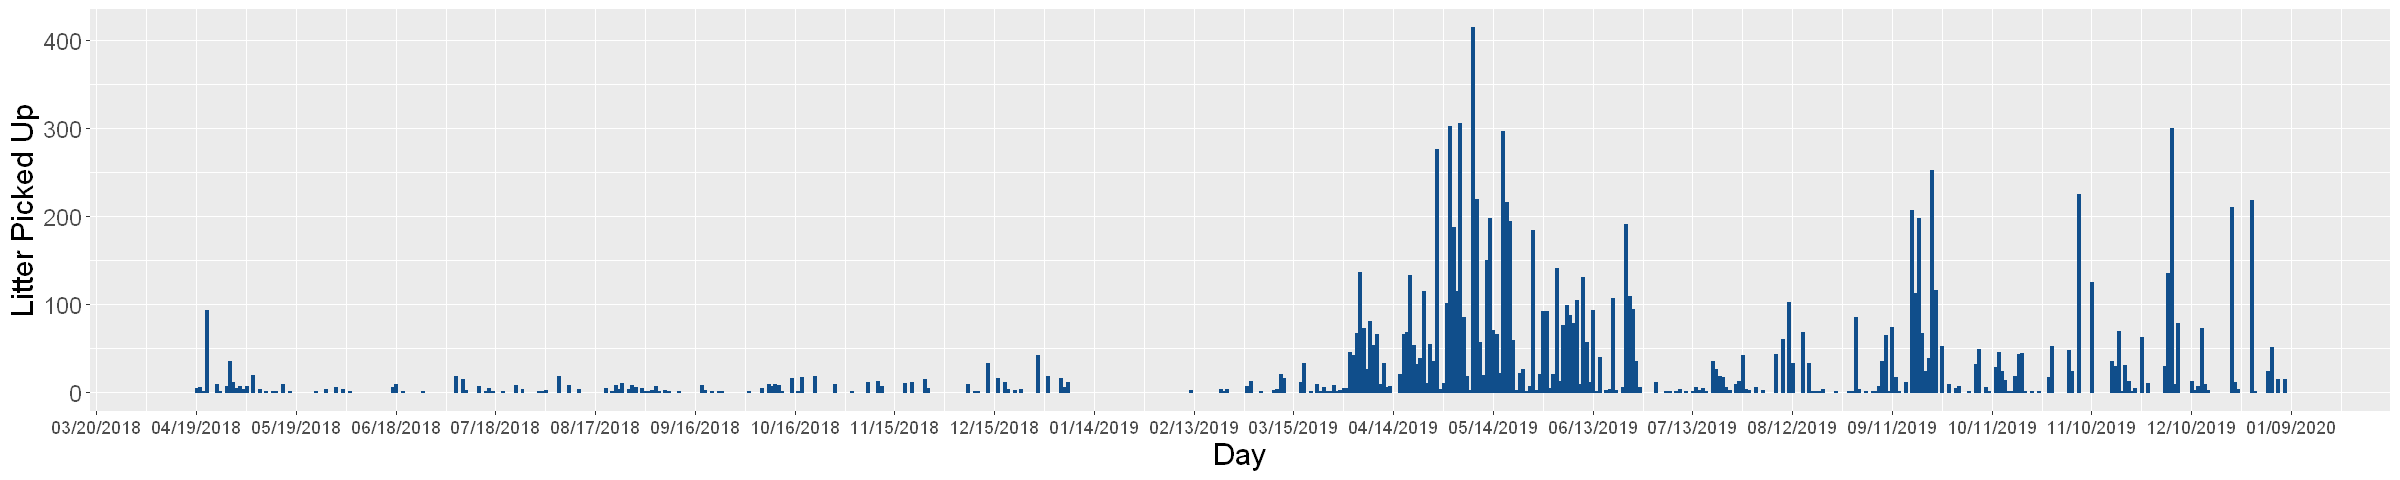

In [434]:
# a bar chart showing the amount of litter picked up each day from 
# the beginning of the data file to the end (i.e. from Apr 4, 2018 to Jan 7, 2020)
options(repr.plot.width = 20, repr.plot.height = 4)
ggplot(data = dates, aes(x = as.Date(Date), y = Count)) + geom_col(color = "dodgerblue4", fill = "dodgerblue4") + 
scale_x_date(date_breaks = "30 days", date_labels = "%m/%d/%Y") +
xlab("Day") + ylab("Litter Picked Up") + 
theme(axis.text.x = element_text(size = 11), axis.text.y = element_text(size = 14), axis.title.x = element_text(size = 18), axis.title.y = element_text(size = 18)) 

In [435]:
# table for litter picked up each day of week
week <- data.frame(table(weekdays(as.Date(data$date, "%Y-%m-%d"))))
names(week)[1] <- "Day"
names(week)[2] <- "Count"

# reorder by days of week rather than count total
week$Day <- factor(week$Day, levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"))
week <- week[order(week$Day), ]
week

,Day,Count
2,Monday,1543
6,Tuesday,1384
7,Wednesday,2187
5,Thursday,1541
1,Friday,1355
3,Saturday,1724
4,Sunday,2167


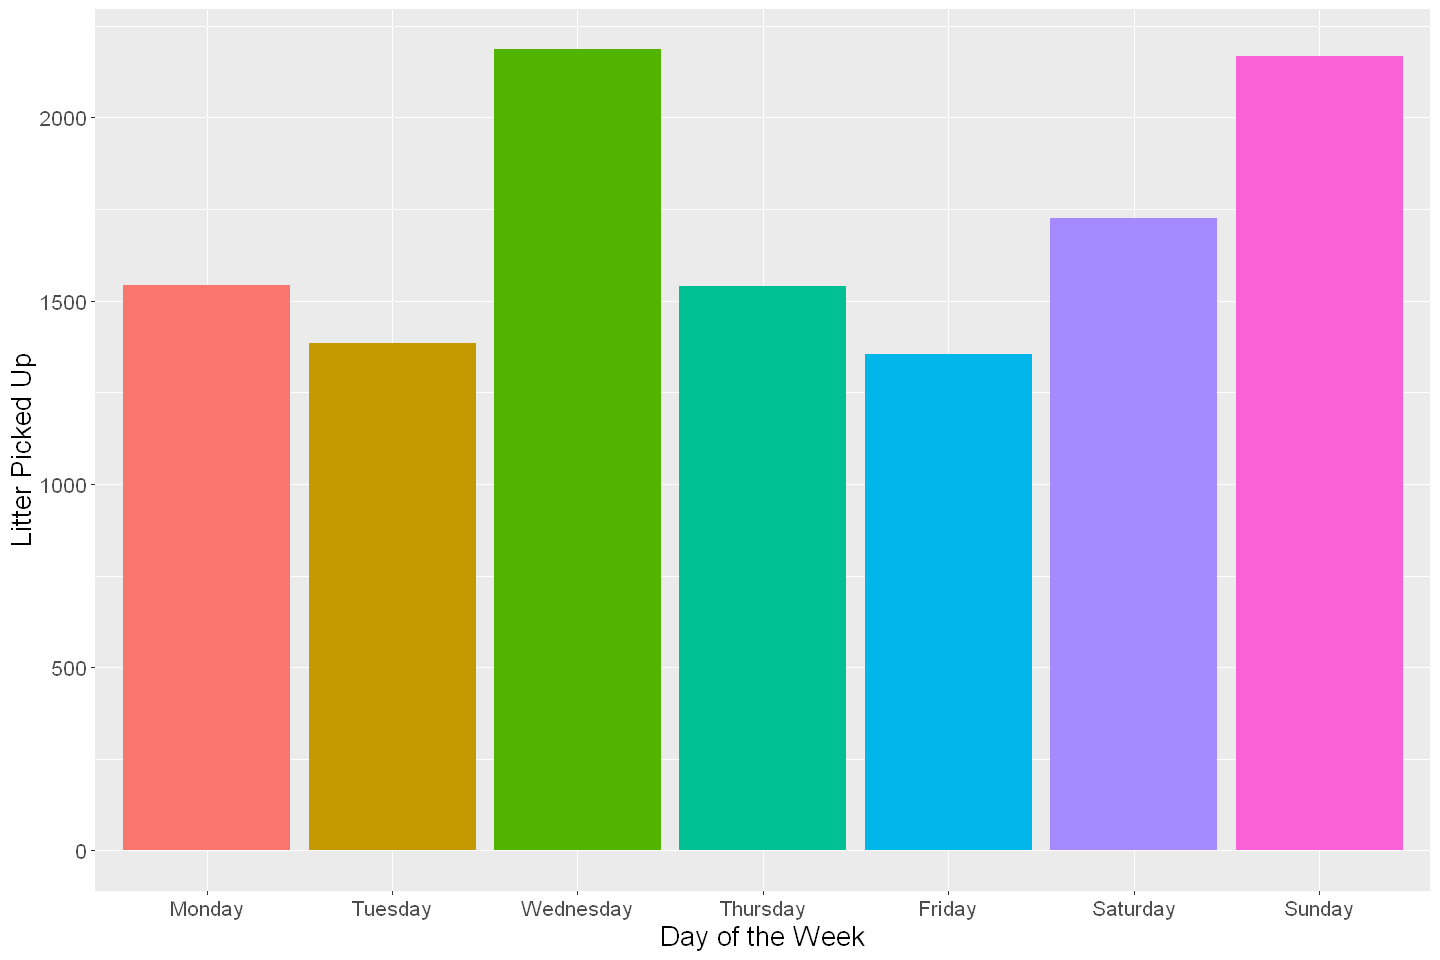

In [436]:
# a bar chart showing the amount of litter picked up by day of the week (i.e. from Monday to Sunday)
options(repr.plot.width = 12, repr.plot.height = 8)
ggplot(data = week, aes(x = Day, y = Count, fill = Day)) + geom_col() + 
xlab("Day of the Week") + ylab("Litter Picked Up") + 
theme(text = element_text(size = 16), legend.position = "none")

In [437]:
# table for litter picked up each hour

# create empty data frame from 0-23 padded to two digits
hour <- data.frame(formatC(0:23, width = 2, format = "d", flag = "0"), 0)
names(hour)[1] <- "Hour"
names(hour)[2] <- "Count"

# extract hour from time column into new data frame
hour_trim <- data.frame(table(format(strptime(data$time, "%H:%M:%S"), "%H")))
names(hour_trim)[1] <- "Hour"
names(hour_trim)[2] <- "Count"

# loop through both dataframes and merge where time matches
for (i in 1: length(hour$Hour)) {
    for (j in 1: length(hour_trim$Hour)) {
        if (hour$Hour[i] == hour_trim$Hour[j]) {
            hour$Count[i] <- hour_trim$Count[j]
        }
    }
}

hour

Hour,Count
00,3
01,0
02,1
03,0
04,0
05,0
06,0
07,0
08,359
09,884


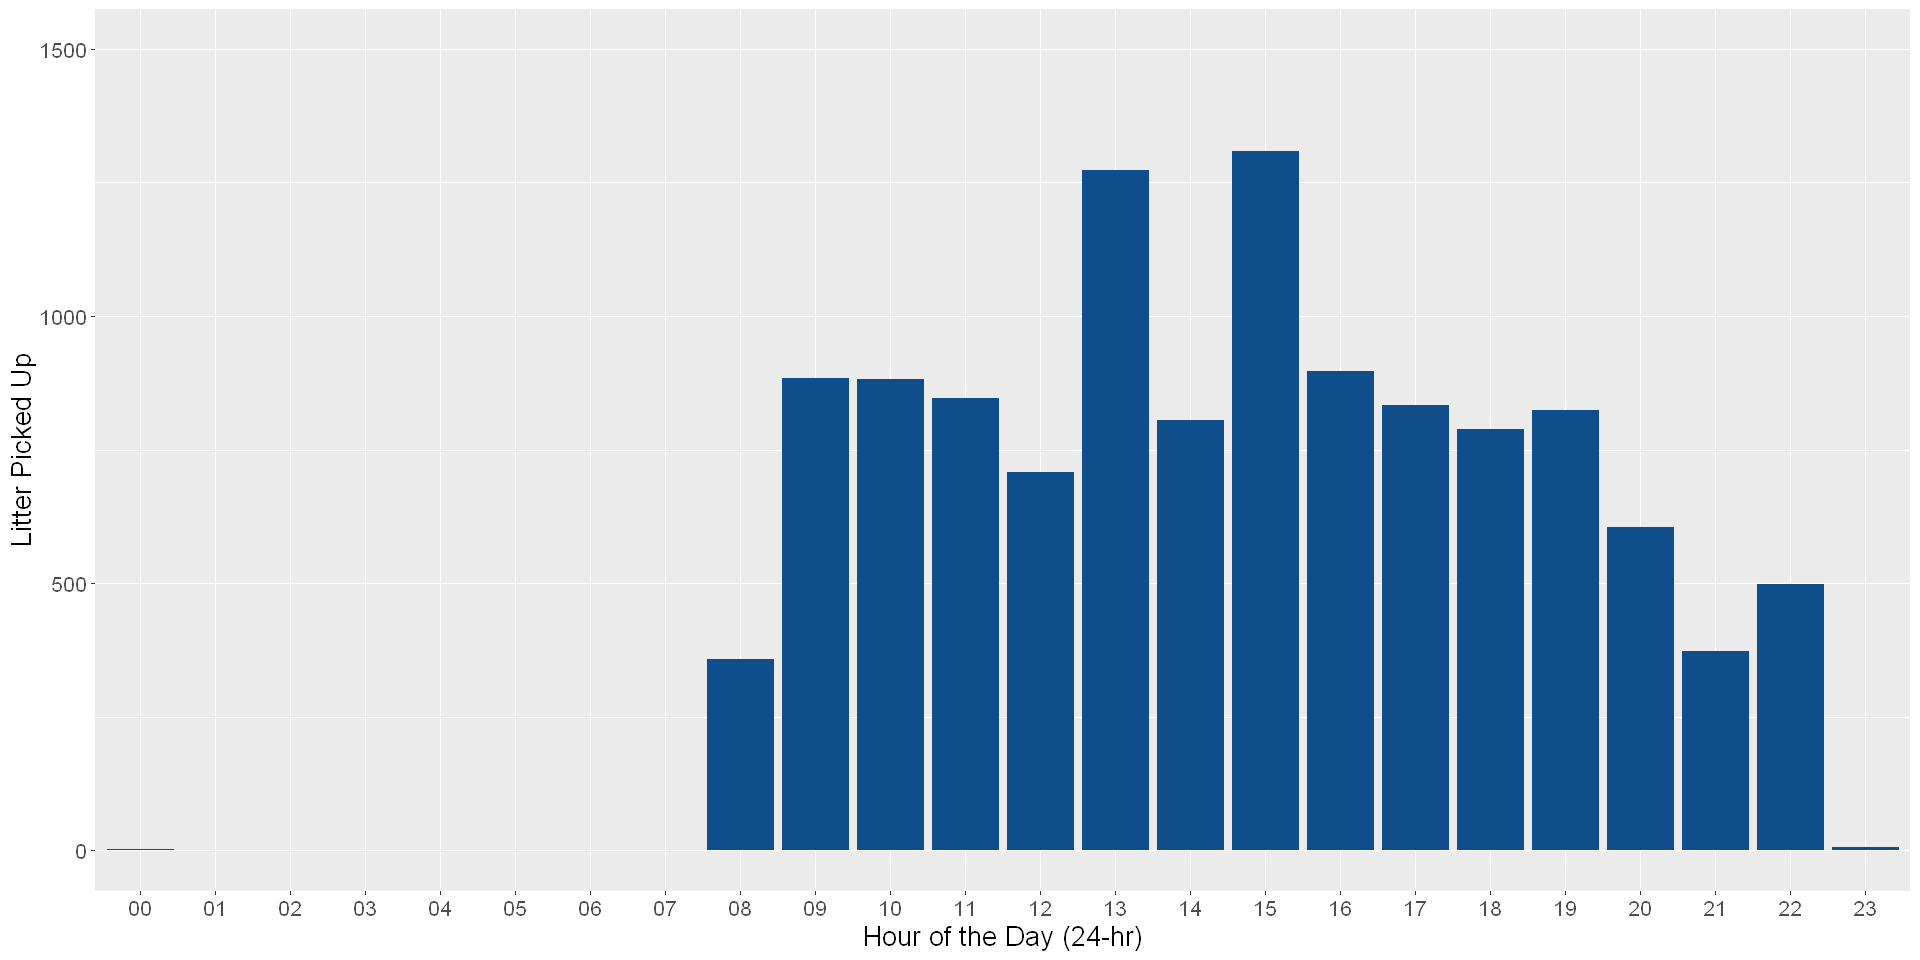

In [438]:
# a bar chart showing the amount of litter picked up by hour of the day (all 24 of them)
options(repr.plot.width = 16, repr.plot.height = 8)
ggplot(data = hour, aes(x = Hour, y = Count)) + geom_col(fill = "dodgerblue4") +
ylim(0, 1500) + 
xlab("Hour of the Day (24-hr)") + ylab("Litter Picked Up") + 
theme(text = element_text(size = 16))

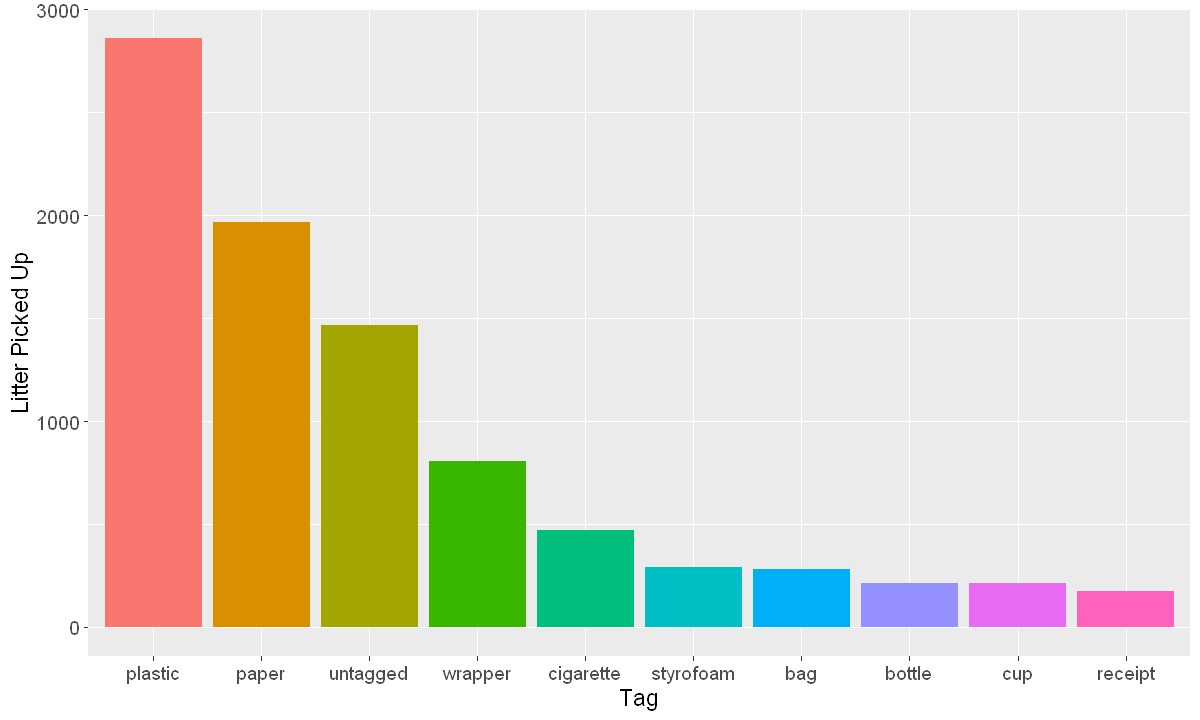

In [439]:
# a bar chart showing the number of pieces picked up by tag 
# (e.g. the individual tags like 'plastic', 'paper', 'wrapper', 'bag', etc., including 'untagged', 
# not the combined tags like 'plastic, balloon') for the top 10 tags
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(data = top10_tags, aes(x = Tag, y = Count, fill = Tag)) + geom_col() + 
xlab("Tag") + ylab("Litter Picked Up") + 
theme(text = element_text(size = 14), legend.position = "none")

In [440]:
# write the cleaned data to a CSV file
write.csv(data, "litterati_challenge-65_CLEANED.csv")